In [ ]:
#Authentication
import ee
ee.Authenticate()

project_id = 'ee-XXX' 
ee.Initialize(project=project_id)

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/XXX/XXX/")

Mounted at /content/drive


In [ ]:
# @title Lib imports:
import folium
from folium.plugins import DualMap
from branca.element import Template, MacroElement
#print('Using Folium version ', folium.__version__)
#from os import MFD_HUGE_1MB
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Iterable, List, Tuple
#from google.colab import auth
import datetime as dt
import datetime
import time
import numpy as np
import geopandas as gpd
from shapely.geometry import shape, Polygon, MultiPolygon
from shapely import wkt
from google.cloud import storage
from folium.plugins import Draw
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import io
import base64
from PIL import Image
import os
import random
import json
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, HTML
from shapely.geometry import Polygon as ShapelyPolygon, Point as ShapelyPoint
import re
#Exportation function 
from scripts.export_planet_nicfi_function import *
from scripts.visualization_grid_sampling_function import *


In [ ]:
#@title Dataset with Numeric Labels/ GEE ASSET
def load_cleandata(asset_id):
    return ee.FeatureCollection(asset_id)

# Load the datasets
clean2018 = load_cleandata('projects/ee-XXX/assets/XXX')
clean2019 = load_cleandata('projects/ee-XXX/assets/XXX')
clean2020 = load_cleandata('projects/ee-XXX/assets/XXX')
clean2023 = load_cleandata('projects/ee-XXX/assets/XXX')

# Merge all datasets into one FeatureCollection
clean_data = clean2018.merge(clean2019).merge(clean2020).merge(clean2023)

In [ ]:
#@title Examine the 2023 data
# Load the FeatureCollection
polygons = ee.FeatureCollection('projects/ee-XXX/assets/XXX')

# Get count of features
count = polygons.size().getInfo()
print(f"Total features: {count}")

# Get properties/columns
props = polygons.first().propertyNames().getInfo()
print(f"Properties: {props}")

# Get sample features
sample = polygons.limit(2).getInfo()
for feature in sample['features']:
    print(f"ID: {feature['id']}")
    print(f"Properties: {feature['properties']}")
    print(f"Geometry type: {feature['geometry']['type']}")
    print("---")

# Check if Class_label and Name_label exist
if 'Class_label' in props:
    class_counts = polygons.aggregate_histogram('Class_label').getInfo()
    print(f"Class distribution: {class_counts}")

if 'Name_label' in props:
    name_counts = polygons.aggregate_histogram('Name_label').getInfo()
    print(f"Name_label distribution: {name_counts}")

Total features: 5827
Properties: ['Year', 'Sub_class', 'Class_label', 'Class', 'ID', 'Sub_class_label', 'system:index', 'Name_label', 'Name']
ID: 00000000000000000000
Properties: {'Class': 'Crop', 'Class_label': 0, 'ID': '6.0', 'Name': 'Cashew', 'Name_label': 6, 'Sub_class': 'Tree_Crops', 'Sub_class_label': 6, 'Year': 2023}
Geometry type: Polygon
---
ID: 00000000000000000001
Properties: {'Class': 'Crop', 'Class_label': 0, 'ID': '7.0', 'Name': 'Cashew', 'Name_label': 6, 'Sub_class': 'Tree_Crops', 'Sub_class_label': 6, 'Year': 2023}
Geometry type: Polygon
---
Class distribution: {'0': 4697, '1': 1130}
Name_label distribution: {'12': 444, '14': 181, '17': 3, '18': 1130, '19': 2, '21': 807, '22': 380, '23': 74, '26': 421, '33': 1732, '38': 87, '41': 9, '45': 2, '47': 59, '50': 79, '53': 302, '54': 22, '55': 2, '58': 2, '6': 5, '62': 1, '63': 5, '64': 37, '7': 41}


Improved Planet NICFI Sampling Visualization Tool
This tool visualizes the sampling strategy for extracting imagery patches.
Large area threshold: 0.6 hectares
Coverage thresholds: 60.0% (large crop), 40.0% (large non-crop), 40.0% (small polygons)
Buffer size: 35 meters
------------------------------------------------
Visualizing polygons for name_labels: [33, 55, 6]
Found 1732 polygons for Name_label 33
Polygon 1 coordinates structure: <class 'list'>
  First element type: <class 'list'>
    Inner element type: <class 'list'>
      Sample coordinate: [-13.856772458567361, 13.53756772618523]
Polygon 2 coordinates structure: <class 'list'>
  First element type: <class 'list'>
    Inner element type: <class 'list'>
      Sample coordinate: [-13.856772458567361, 13.53756772618523]
Polygon 3 coordinates structure: <class 'list'>
  First element type: <class 'list'>
    Inner element type: <class 'list'>
      Sample coordinate: [-15.721104768039162, 13.301855129698248]
Polygon 4 coordinates

Found 2 polygons for Name_label 55
Polygon 1 coordinates structure: <class 'list'>
  First element type: <class 'list'>
    Inner element type: <class 'list'>
      Sample coordinate: [-15.911325556176225, 13.871830876637585]
Polygon 2 coordinates structure: <class 'list'>
  First element type: <class 'list'>
    Inner element type: <class 'list'>
      Sample coordinate: [-16.34407686421861, 13.83719251367209]


Found 5 polygons for Name_label 6
Polygon 1 coordinates structure: <class 'list'>
  First element type: <class 'list'>
    Inner element type: <class 'list'>
      Sample coordinate: [-16.356923561724813, 13.850908749702093]
Polygon 2 coordinates structure: <class 'list'>
  First element type: <class 'list'>
    Inner element type: <class 'list'>
      Sample coordinate: [-16.372320825370544, 13.828243158583279]
Polygon 3 coordinates structure: <class 'list'>
  First element type: <class 'list'>
    Inner element type: <class 'list'>
      Sample coordinate: [-16.427288178618657, 13.751033818553093]
Polygon 4 coordinates structure: <class 'list'>
  First element type: <class 'list'>
    Inner element type: <class 'list'>
      Sample coordinate: [-16.42793021885807, 13.765191404042724]
Polygon 5 coordinates structure: <class 'list'>
  First element type: <class 'list'>
    Inner element type: <class 'list'>
      Sample coordinate: [-16.428010552653834, 13.76905748574128]




To incorporate the improved spatial sampling into your export function:
1. Replace the 'create_interior_grid_points' function in your script
2. The new function uses a quadrant-based approach for better spatial distribution
3. This ensures sampling points are spread throughout polygons, not just clustered near the centroid


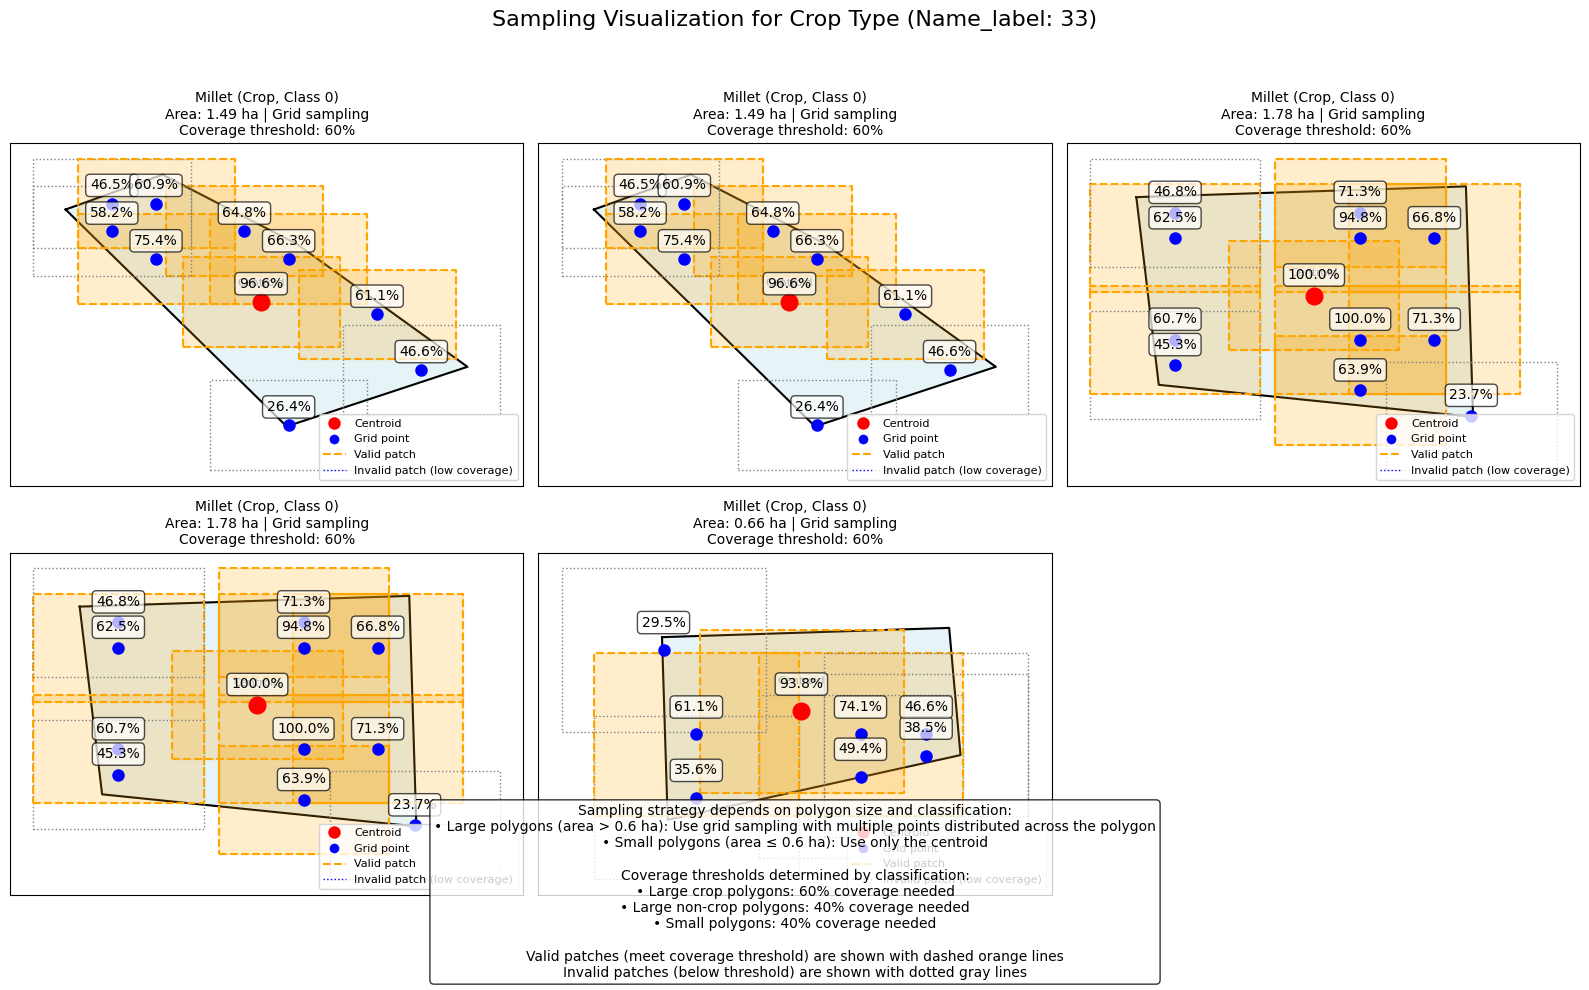

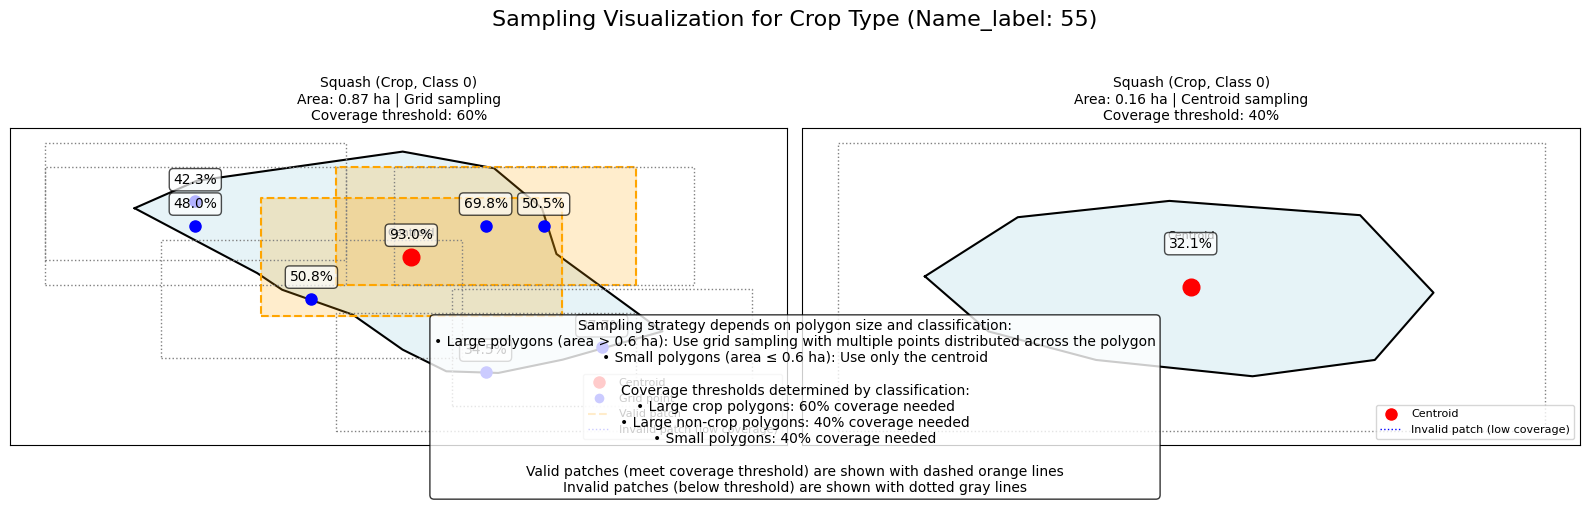

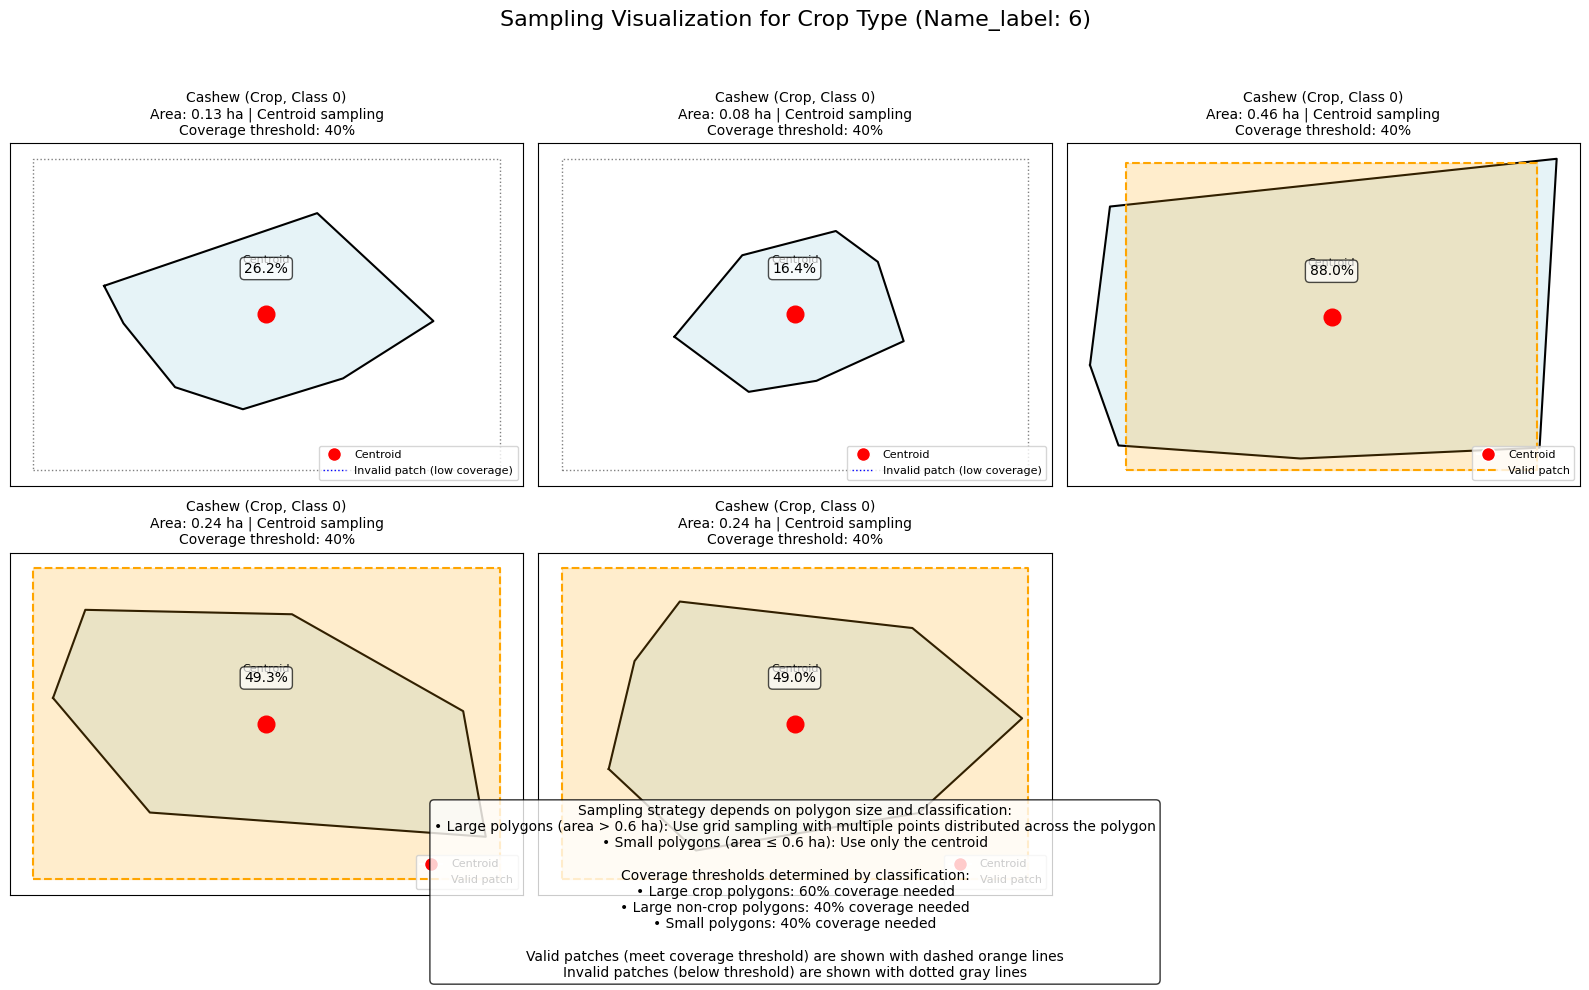

In [ ]:
#@title Visualize the grids and patches sampling
if __name__ == "__main__":
    # Replace with your asset path
    asset_path = "projects/ee-XXX/assets/XXX"

    # Define parameters (same as in the original function)
    large_area_threshold = 0.6 #changed from 1
    large_crop_coverage = 0.6
    large_nocrop_coverage = 0.4
    small_coverage = 0.4
    buffer_size = 35

    print("Improved Planet NICFI Sampling Visualization Tool")
    print("================================================")
    print(f"This tool visualizes the sampling strategy for extracting imagery patches.")
    print(f"Large area threshold: {large_area_threshold} hectares")
    print(f"Coverage thresholds: {large_crop_coverage*100}% (large crop), {large_nocrop_coverage*100}% (large non-crop), {small_coverage*100}% (small polygons)")
    print(f"Buffer size: {buffer_size} meters")
    print("------------------------------------------------")

    # You can customize these parameters:
    max_polygons = 5      # Number of polygons to visualize per crop type
    name_labels = [33, 55, 6]    # Specific Name_label IDs to process, e.g. [33, 55, 6]
    display_satellite = True  # Whether to show satellite imagery in the interactive map

    # Visualize sampling strategy
    visualize_sampling_strategy(
        asset_path=asset_path,
        large_area_threshold=large_area_threshold,
        large_crop_coverage=large_crop_coverage,
        large_nocrop_coverage=large_nocrop_coverage,
        small_coverage=small_coverage,
        buffer_size=buffer_size,
        max_polygons=max_polygons,
        name_labels=name_labels,
        display_satellite=display_satellite
    )

    print("\n")
    print("To incorporate the improved spatial sampling into your export function:")
    print("1. Replace the 'create_interior_grid_points' function in your script")
    print("2. The new function uses a quadrant-based approach for better spatial distribution")
    print("3. This ensures sampling points are spread throughout polygons, not just clustered near the centroid")